# 실재 데이터로 만들어 보는 모델
2010년 부터 2016년 까지 부동산 거래 데이터

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv("./data/house_train.csv")
df_test = pd.read_csv("./data/house_test.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
df.isnull().sum().sort_values(ascending=False).head(25) # 결측치 데이터가 있는 컬럼 및 갯수 확인

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [15]:
# 카테고리 데이터 확인 -> one hot incoding 할지 결정
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [17]:
df_onehot = pd.get_dummies(df)

In [19]:
df_onehot = df_onehot.fillna(df_onehot.mean())
df_onehot.isnull().sum().sort_values(ascending=False).head(25)

Id                  0
HeatingQC_Po        0
BsmtFinType1_BLQ    0
BsmtFinType1_ALQ    0
BsmtExposure_No     0
BsmtExposure_Mn     0
BsmtExposure_Gd     0
BsmtExposure_Av     0
BsmtCond_TA         0
BsmtCond_Po         0
BsmtCond_Gd         0
BsmtCond_Fa         0
BsmtQual_TA         0
BsmtQual_Gd         0
BsmtQual_Fa         0
BsmtQual_Ex         0
Foundation_Wood     0
BsmtFinType1_GLQ    0
BsmtFinType1_LwQ    0
BsmtFinType1_Rec    0
Heating_GasA        0
HeatingQC_Fa        0
HeatingQC_Ex        0
Heating_Wall        0
Heating_OthW        0
dtype: int64

In [26]:
df1 = df.copy()
# 결측치를 확인하여 의미가 없다고 판단되는 특성제거
df1.dropna(axis=1, thresh=400, inplace=True) # thresh -> Nan 이아닌 값의 갯수가 n개 미만인 값을 제거
print(len(df1.columns))

77


In [27]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
df1 = pd.get_dummies(df)

df1 = df1.fillna(df.mean(numeric_only=True))
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [71]:
# 변수들간의 상관관계
df1_corr = df1.corr()
# SalePrice와 특성 간의 상관관계
df1_corr_sort = df1_corr.sort_values('SalePrice', ascending=False)
df1_corr_sort['SalePrice'].head(20)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.475241
GarageYrBlt         0.470177
Fireplaces          0.466929
ExterQual_Gd        0.452466
ExterQual_Ex        0.451164
BsmtFinType1_GLQ    0.434597
Name: SalePrice, dtype: float64

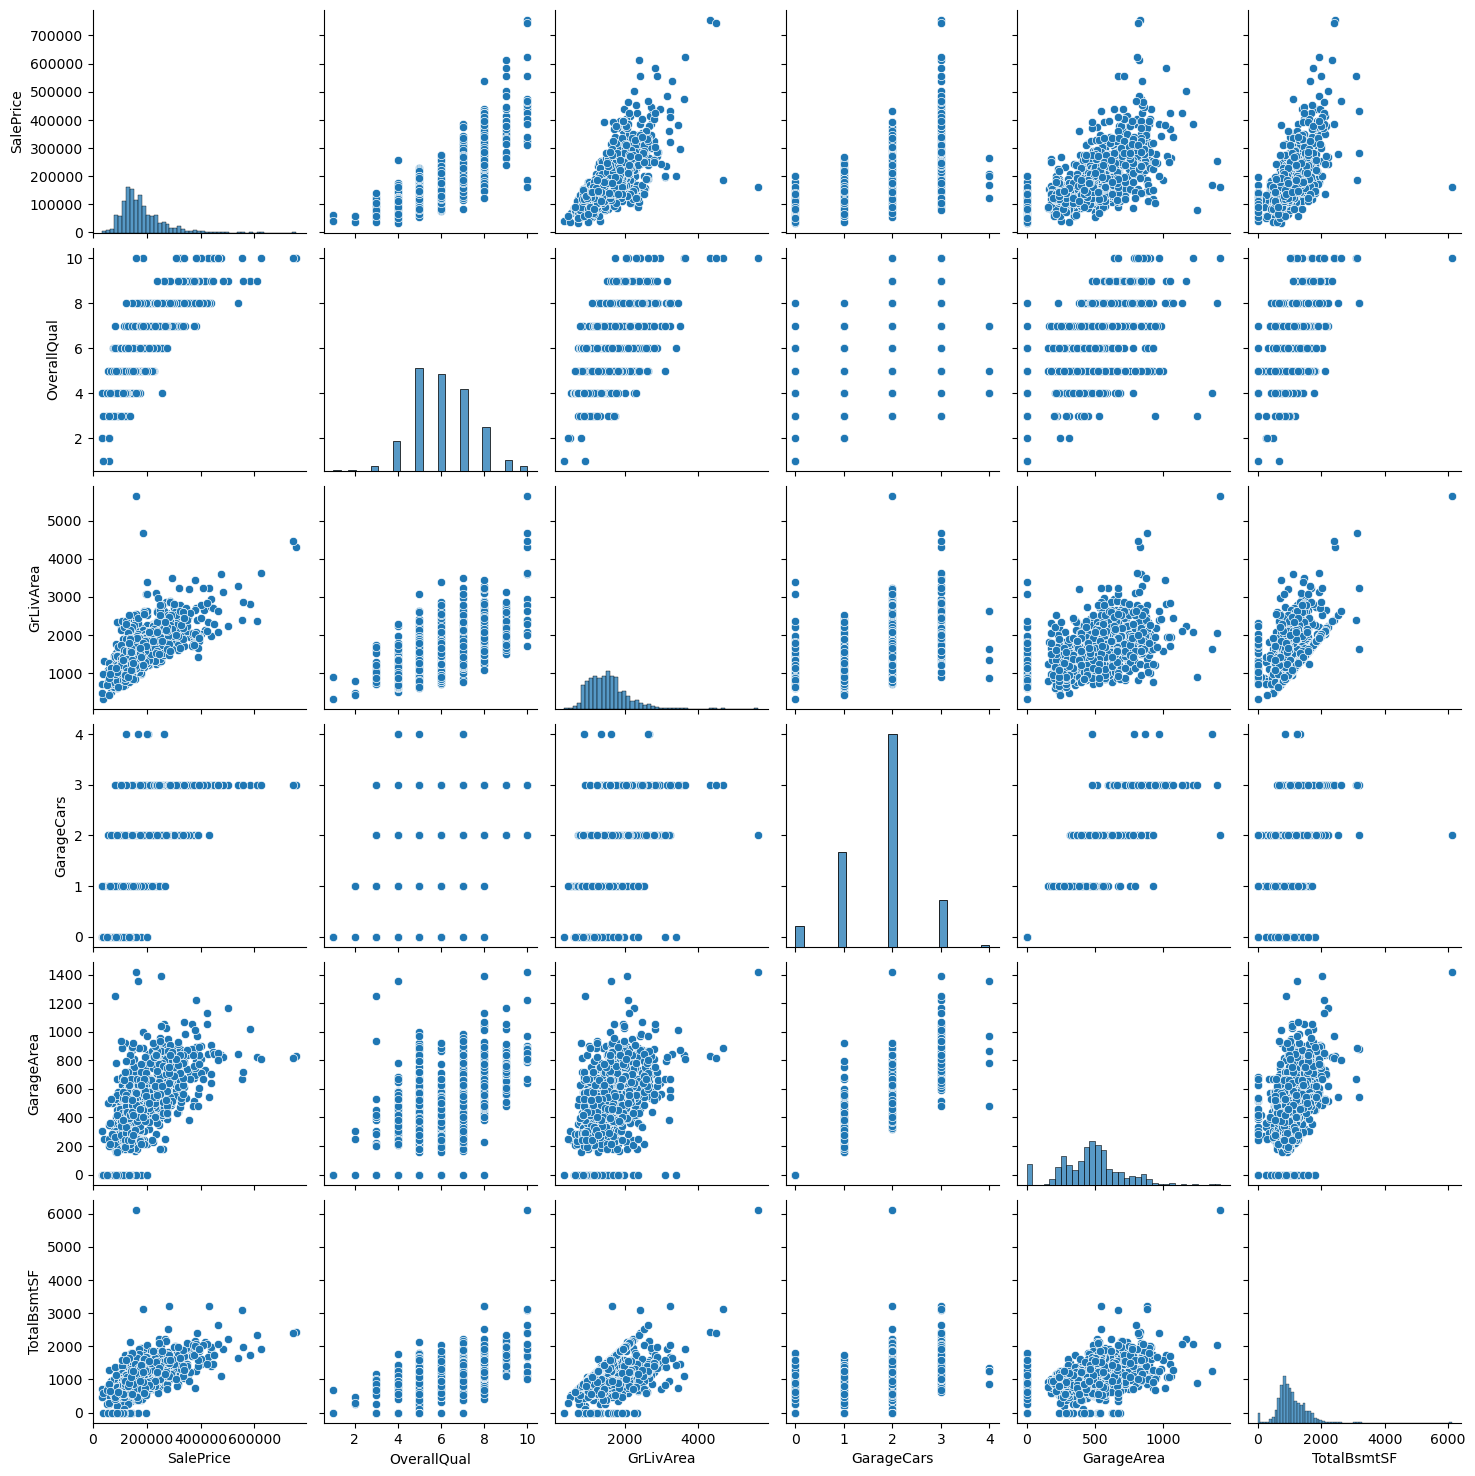

In [32]:
cols = [ 'SalePrice', 'OverallQual', 'GrLivArea',  'GarageCars',   'GarageArea',   'TotalBsmtSF']

sns.pairplot(df[cols])
plt.show()

In [36]:
cols = [ 'OverallQual', 'GrLivArea',  'GarageCars',   'GarageArea',   'TotalBsmtSF']
X = df1[cols]
y = df1['SalePrice']

print(X.shape, y.shape)

(1460, 5) (1460,)


In [59]:
# X
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 5) (292, 5) (1168,) (292,)


In [60]:
# 
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './data/model/all/house-{epoch:03d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0, save_best_only=True)

model = Sequential()

model.add(Dense(20, input_dim=X.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.25, callbacks=[early_stop, checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 11ms/step - loss: 40240041984.0000 - accuracy: 0.0000e+00 - val_loss: 33760006144.0000 - val_accuracy: 0.0000e+00
Epoch 2/2000
28/28 [==============================] - 0s 5ms/step - loss: 39801126912.0000 - accuracy: 0.0000e+00 - val_loss: 33116231680.0000 - val_accuracy: 0.0000e+00
Epoch 3/2000
28/28 [==============================] - 0s 5ms/step - loss: 38538178560.0000 - accuracy: 0.0000e+00 - val_loss: 31251755008.0000 - val_accuracy: 0.0000e+00
Epoch 4/2000
28/28 [==============================] - 0s 5ms/step - loss: 35079733248.0000 - accuracy: 0.0000e+00 - val_loss: 26602006528.0000 - val_accuracy: 0.0000e+00
Epoch 5/2000
28/28 [==============================] - 0s 5ms/step - loss: 27533746176.0000 - accuracy: 0.0000e+00 - val_loss: 17846390784.0000 - val_accuracy: 0.0000e+00
Epoch 6/2000
28/28 [==============================] - 0s 5ms/step - loss: 15554519040.0000 - accuracy: 0.0000e+00 - val_loss: 7041770496.0000 - val_a

28/28 [==============================] - 0s 4ms/step - loss: 2082764800.0000 - accuracy: 0.0000e+00 - val_loss: 1501435264.0000 - val_accuracy: 0.0000e+00
Epoch 50/2000
28/28 [==============================] - 0s 4ms/step - loss: 2077988736.0000 - accuracy: 0.0000e+00 - val_loss: 1553275520.0000 - val_accuracy: 0.0000e+00
Epoch 51/2000
28/28 [==============================] - 0s 3ms/step - loss: 2077805312.0000 - accuracy: 0.0000e+00 - val_loss: 1504856832.0000 - val_accuracy: 0.0000e+00
Epoch 52/2000
28/28 [==============================] - 0s 3ms/step - loss: 2093642496.0000 - accuracy: 0.0000e+00 - val_loss: 1529741696.0000 - val_accuracy: 0.0000e+00
Epoch 53/2000
28/28 [==============================] - 0s 3ms/step - loss: 2074727424.0000 - accuracy: 0.0000e+00 - val_loss: 1513856000.0000 - val_accuracy: 0.0000e+00
Epoch 54/2000
28/28 [==============================] - 0s 4ms/step - loss: 2078404352.0000 - accuracy: 0.0000e+00 - val_loss: 1499418240.0000 - val_accuracy: 0.0000e+00


In [55]:
score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 3411197440.0000 - accuracy: 0.0000e+00


In [65]:
real_prices = []
pred_prices = []
X_num = []
n = 0

y_pred = model.predict(X_test).flatten()
for i in range(40):
    real = y_test.iloc[i]
    pred = y_pred[i]
    print('실재가격 : {:.2f}, 예상가격 : {:.2f}'.format(real, pred))
    real_prices.append(real)
    pred_prices.append(pred)
    n += 1
    X_num.append(n)

10/10 [==============================] - 0s 2ms/step
실재가격 : 200624.00, 예상가격 : 298427.09
실재가격 : 133000.00, 예상가격 : 157824.16
실재가격 : 110000.00, 예상가격 : 138036.95
실재가격 : 192000.00, 예상가격 : 223786.47
실재가격 : 88000.00, 예상가격 : 115022.47
실재가격 : 85000.00, 예상가격 : 138017.47
실재가격 : 282922.00, 예상가격 : 225541.64
실재가격 : 141000.00, 예상가격 : 166725.05
실재가격 : 745000.00, 예상가격 : 462862.34
실재가격 : 148800.00, 예상가격 : 133276.56
실재가격 : 208900.00, 예상가격 : 189881.19
실재가격 : 136905.00, 예상가격 : 231743.89
실재가격 : 225000.00, 예상가격 : 210674.55
실재가격 : 123000.00, 예상가격 : 122816.98
실재가격 : 119200.00, 예상가격 : 141941.84
실재가격 : 145000.00, 예상가격 : 172351.58
실재가격 : 190000.00, 예상가격 : 200421.77
실재가격 : 123600.00, 예상가격 : 113149.38
실재가격 : 149350.00, 예상가격 : 160821.53
실재가격 : 155000.00, 예상가격 : 172890.00
실재가격 : 166000.00, 예상가격 : 187332.31
실재가격 : 144500.00, 예상가격 : 128879.45
실재가격 : 110000.00, 예상가격 : 132275.22
실재가격 : 174000.00, 예상가격 : 154234.44
실재가격 : 185000.00, 예상가격 : 203663.41
실재가격 : 168000.00, 예상가격 : 187773.22
실재가격 : 177500.00, 예상가격 : 169956.92
실재가격

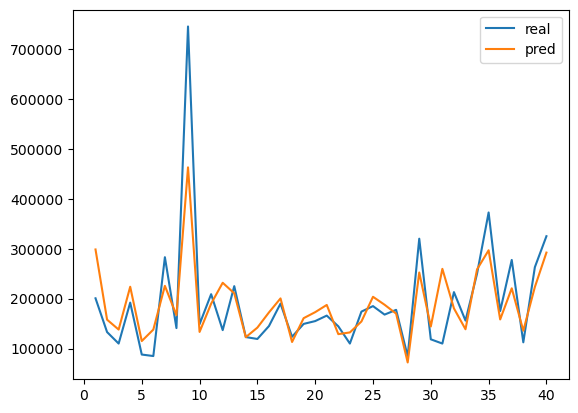

In [66]:
plt.plot(X_num, real_prices, label='real')
plt.plot(X_num, pred_prices, label='pred')
plt.legend()
plt.show()

In [78]:
df2 = df.copy()
df2_test = df_test.copy()
# 결측치를 확인하여 의미가 없다고 판단되는 특성제거
df2.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)
df2_test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)
print(len(df2.columns), len(df2_test.columns))

77 76


In [80]:
df2 = pd.get_dummies(df)
df2 = df2.fillna(df2.mean(numeric_only=True))

df2_test = pd.get_dummies(df)
df2_test = df2_test.fillna(df2_test.mean(numeric_only=True))

In [89]:
# 변수들간의 상관관계
df2_corr = df2.corr()
# SalePrice와 특성 간의 상관관계
df2_corr_sort = df2_corr.sort_values('SalePrice', ascending=False)

cols = df2_corr[(df2_corr['SalePrice'] > 0.5)].index
# df2_corr_sort = df2_corr.sort_values('SalePrice', ascending=False)['SalePrice']
# cols = df2_corr[(df2_corr.values > 0.5)].index
cols

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex'],
      dtype='object')

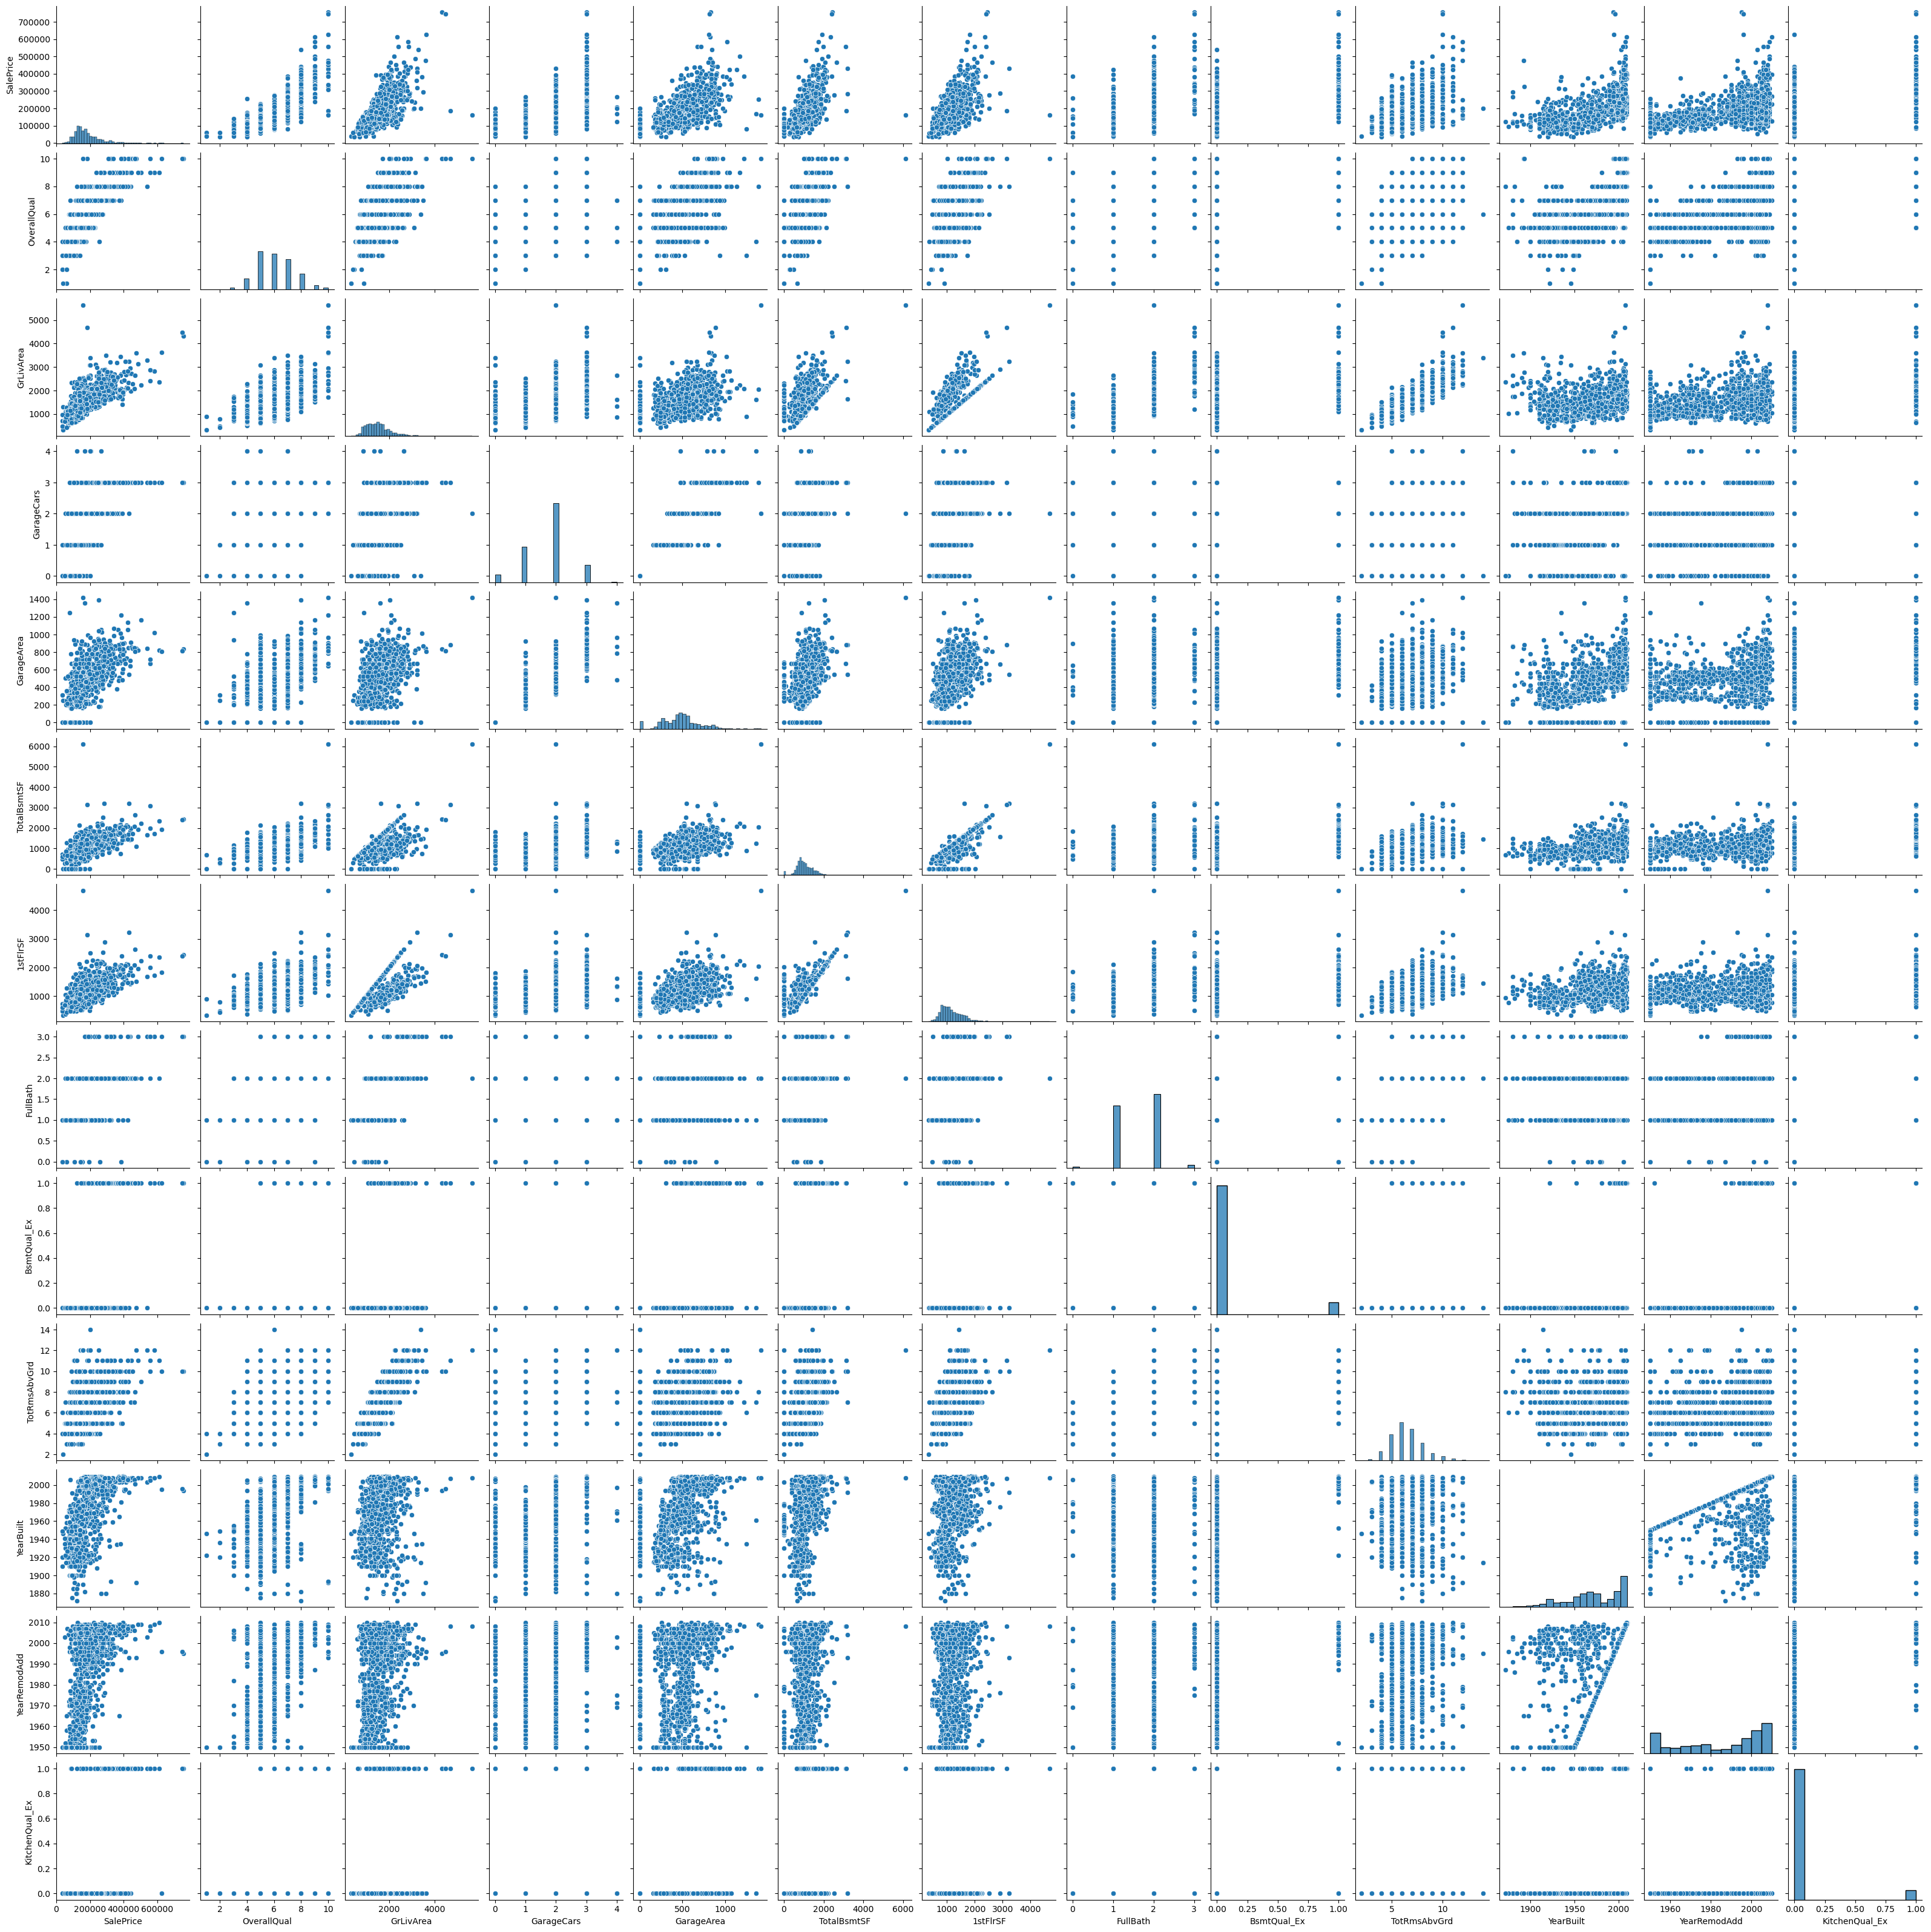

In [82]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex']

sns.pairplot(df2[cols])
plt.show()

In [90]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex']
X_train = df2[cols]
y_train = df2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8, random_state=0, shuffle=True)

early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './data/model/all/house-{epoch:03d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0, save_best_only=True)

model = Sequential()

model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.25, callbacks=[early_stop, checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 12ms/step - loss: 39825137664.0000 - accuracy: 0.0000e+00 - val_loss: 32841267200.0000 - val_accuracy: 0.0000e+00
Epoch 2/2000
28/28 [==============================] - 0s 5ms/step - loss: 37802065920.0000 - accuracy: 0.0000e+00 - val_loss: 29803341824.0000 - val_accuracy: 0.0000e+00
Epoch 3/2000
28/28 [==============================] - 0s 5ms/step - loss: 31888949248.0000 - accuracy: 0.0000e+00 - val_loss: 21451767808.0000 - val_accuracy: 0.0000e+00
Epoch 4/2000
28/28 [==============================] - 0s 4ms/step - loss: 18837383168.0000 - accuracy: 0.0000e+00 - val_loss: 7512732160.0000 - val_accuracy: 0.0000e+00
Epoch 5/2000
28/28 [==============================] - 0s 5ms/step - loss: 5667268608.0000 - accuracy: 0.0000e+00 - val_loss: 2839389696.0000 - val_accuracy: 0.0000e+00
Epoch 6/2000
28/28 [==============================] - 0s 6ms/step - loss: 3518212352.0000 - accuracy: 0.0000e+00 - val_loss: 2812642560.0000 - val_accur

28/28 [==============================] - 0s 5ms/step - loss: 1999699456.0000 - accuracy: 0.0000e+00 - val_loss: 1490909568.0000 - val_accuracy: 0.0000e+00
Epoch 50/2000
28/28 [==============================] - 0s 3ms/step - loss: 1981916800.0000 - accuracy: 0.0000e+00 - val_loss: 1493801600.0000 - val_accuracy: 0.0000e+00
Epoch 51/2000
28/28 [==============================] - 0s 5ms/step - loss: 1982537472.0000 - accuracy: 0.0000e+00 - val_loss: 1475080192.0000 - val_accuracy: 0.0000e+00
Epoch 52/2000
28/28 [==============================] - 0s 3ms/step - loss: 1992245376.0000 - accuracy: 0.0000e+00 - val_loss: 1611792128.0000 - val_accuracy: 0.0000e+00
Epoch 53/2000
28/28 [==============================] - 0s 3ms/step - loss: 1996669056.0000 - accuracy: 0.0000e+00 - val_loss: 1488480256.0000 - val_accuracy: 0.0000e+00
Epoch 54/2000
28/28 [==============================] - 0s 3ms/step - loss: 1963623424.0000 - accuracy: 0.0000e+00 - val_loss: 1484211584.0000 - val_accuracy: 0.0000e+00


28/28 [==============================] - 0s 3ms/step - loss: 1891582976.0000 - accuracy: 0.0000e+00 - val_loss: 1396196096.0000 - val_accuracy: 0.0000e+00
Epoch 98/2000
28/28 [==============================] - 0s 4ms/step - loss: 1895730432.0000 - accuracy: 0.0000e+00 - val_loss: 1364350080.0000 - val_accuracy: 0.0000e+00
Epoch 99/2000
28/28 [==============================] - 0s 4ms/step - loss: 1905071360.0000 - accuracy: 0.0000e+00 - val_loss: 1403915520.0000 - val_accuracy: 0.0000e+00
Epoch 100/2000
28/28 [==============================] - 0s 3ms/step - loss: 1902032512.0000 - accuracy: 0.0000e+00 - val_loss: 1391408000.0000 - val_accuracy: 0.0000e+00
Epoch 101/2000
28/28 [==============================] - 0s 4ms/step - loss: 1953811840.0000 - accuracy: 0.0000e+00 - val_loss: 1368939136.0000 - val_accuracy: 0.0000e+00
Epoch 102/2000
28/28 [==============================] - 0s 5ms/step - loss: 1896978816.0000 - accuracy: 0.0000e+00 - val_loss: 1355660800.0000 - val_accuracy: 0.0000e+

28/28 [==============================] - 0s 6ms/step - loss: 1888325376.0000 - accuracy: 0.0000e+00 - val_loss: 1289293824.0000 - val_accuracy: 0.0000e+00
Epoch 146/2000
28/28 [==============================] - 0s 6ms/step - loss: 1883672704.0000 - accuracy: 0.0000e+00 - val_loss: 1287000064.0000 - val_accuracy: 0.0000e+00
Epoch 147/2000
28/28 [==============================] - 0s 6ms/step - loss: 1850418048.0000 - accuracy: 0.0000e+00 - val_loss: 1286698240.0000 - val_accuracy: 0.0000e+00
Epoch 148/2000
28/28 [==============================] - 0s 4ms/step - loss: 1860466816.0000 - accuracy: 0.0000e+00 - val_loss: 1288959872.0000 - val_accuracy: 0.0000e+00
Epoch 149/2000
28/28 [==============================] - 0s 4ms/step - loss: 1844515200.0000 - accuracy: 0.0000e+00 - val_loss: 1301187072.0000 - val_accuracy: 0.0000e+00
Epoch 150/2000
28/28 [==============================] - 0s 4ms/step - loss: 1866459904.0000 - accuracy: 0.0000e+00 - val_loss: 1289407744.0000 - val_accuracy: 0.0000

28/28 [==============================] - 0s 4ms/step - loss: 1831933824.0000 - accuracy: 0.0000e+00 - val_loss: 1265472000.0000 - val_accuracy: 0.0000e+00
Epoch 194/2000
28/28 [==============================] - 0s 5ms/step - loss: 1833934080.0000 - accuracy: 0.0000e+00 - val_loss: 1259350016.0000 - val_accuracy: 0.0000e+00
Epoch 195/2000
28/28 [==============================] - 0s 4ms/step - loss: 1831196544.0000 - accuracy: 0.0000e+00 - val_loss: 1284939008.0000 - val_accuracy: 0.0000e+00
Epoch 196/2000
28/28 [==============================] - 0s 4ms/step - loss: 1835017984.0000 - accuracy: 0.0000e+00 - val_loss: 1267372416.0000 - val_accuracy: 0.0000e+00
Epoch 197/2000
28/28 [==============================] - 0s 4ms/step - loss: 1881582592.0000 - accuracy: 0.0000e+00 - val_loss: 1261811456.0000 - val_accuracy: 0.0000e+00
Epoch 198/2000
28/28 [==============================] - 0s 4ms/step - loss: 1838907520.0000 - accuracy: 0.0000e+00 - val_loss: 1282228096.0000 - val_accuracy: 0.0000

28/28 [==============================] - 0s 4ms/step - loss: 1819360768.0000 - accuracy: 0.0000e+00 - val_loss: 1248624384.0000 - val_accuracy: 0.0000e+00
Epoch 242/2000
28/28 [==============================] - 0s 4ms/step - loss: 1833614336.0000 - accuracy: 0.0000e+00 - val_loss: 1278724480.0000 - val_accuracy: 0.0000e+00
Epoch 243/2000
28/28 [==============================] - 0s 5ms/step - loss: 1817093376.0000 - accuracy: 0.0000e+00 - val_loss: 1236364288.0000 - val_accuracy: 0.0000e+00
Epoch 244/2000
28/28 [==============================] - 0s 4ms/step - loss: 1827283584.0000 - accuracy: 0.0000e+00 - val_loss: 1237580160.0000 - val_accuracy: 0.0000e+00
Epoch 245/2000
28/28 [==============================] - 0s 4ms/step - loss: 1823378688.0000 - accuracy: 0.0000e+00 - val_loss: 1240154624.0000 - val_accuracy: 0.0000e+00
Epoch 246/2000
28/28 [==============================] - 0s 4ms/step - loss: 1835832576.0000 - accuracy: 0.0000e+00 - val_loss: 1267531136.0000 - val_accuracy: 0.0000

28/28 [==============================] - 0s 4ms/step - loss: 1812679808.0000 - accuracy: 0.0000e+00 - val_loss: 1292577024.0000 - val_accuracy: 0.0000e+00
Epoch 290/2000
28/28 [==============================] - 0s 4ms/step - loss: 1821581184.0000 - accuracy: 0.0000e+00 - val_loss: 1244372864.0000 - val_accuracy: 0.0000e+00


In [91]:
real_prices = []
pred_prices = []
X_num = []
n = 0

y_pred = model.predict(X_test).flatten()
for i in range(40):
    real = y_test.iloc[i]
    pred = y_pred[i]
    print('실재가격 : {:.2f}, 예상가격 : {:.2f}'.format(real, pred))
    real_prices.append(real)
    pred_prices.append(pred)
    n += 1
    X_num.append(n)

10/10 [==============================] - 0s 3ms/step
실재가격 : 200624.00, 예상가격 : 316289.03
실재가격 : 133000.00, 예상가격 : 142921.97
실재가격 : 110000.00, 예상가격 : 127472.77
실재가격 : 192000.00, 예상가격 : 229164.98
실재가격 : 88000.00, 예상가격 : 107566.67
실재가격 : 85000.00, 예상가격 : 129424.48
실재가격 : 282922.00, 예상가격 : 233953.47
실재가격 : 141000.00, 예상가격 : 160895.16
실재가격 : 745000.00, 예상가격 : 548511.31
실재가격 : 148800.00, 예상가격 : 127174.53
실재가격 : 208900.00, 예상가격 : 181936.84
실재가격 : 136905.00, 예상가격 : 236188.78
실재가격 : 225000.00, 예상가격 : 211284.41
실재가격 : 123000.00, 예상가격 : 116182.83
실재가격 : 119200.00, 예상가격 : 131513.62
실재가격 : 145000.00, 예상가격 : 158092.66
실재가격 : 190000.00, 예상가격 : 196955.50
실재가격 : 123600.00, 예상가격 : 103802.33
실재가격 : 149350.00, 예상가격 : 147708.59
실재가격 : 155000.00, 예상가격 : 161220.89
실재가격 : 166000.00, 예상가격 : 186645.06
실재가격 : 144500.00, 예상가격 : 123885.64
실재가격 : 110000.00, 예상가격 : 127735.09
실재가격 : 174000.00, 예상가격 : 143748.34
실재가격 : 185000.00, 예상가격 : 203815.25
실재가격 : 168000.00, 예상가격 : 182499.36
실재가격 : 177500.00, 예상가격 : 162283.30
실재가격

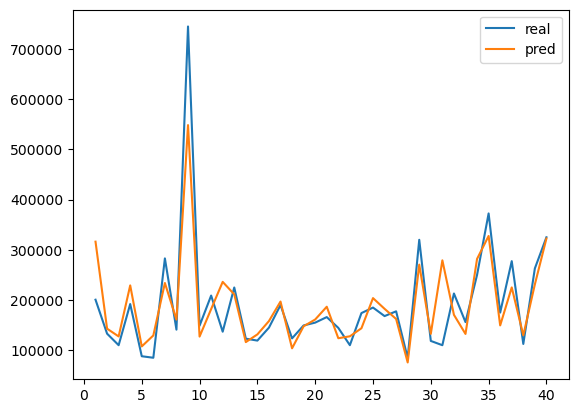

In [92]:
plt.plot(X_num, real_prices, label='real')
plt.plot(X_num, pred_prices, label='pred')
plt.legend()
plt.show()